In [1]:
import pandas as pd
from sklearn import tree

In [2]:
train_df= pd.read_csv('train.csv')

In [3]:
test_df= pd.read_csv('test.csv')

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [6]:
#Converting Sex into numerical values
map_Sex = {'male': 1, 'female': 0}   # Convert the categorical object into numerical
train_df = train_df.replace({'Sex': map_Sex})
test_df = test_df.replace({'Sex': map_Sex})

#### Since from Class we have applied Random Forest Feature Importance method, so we have found below Important  Independent Features:

1. Age
2. Sex
3. Fare

In [9]:
predictor_train=pd.DataFrame([train_df['Age'],train_df['Sex'],train_df['Fare']]).T
predictor_test=pd.DataFrame([test_df['Age'],test_df['Sex'],test_df['Fare']]).T

,Age,Sex,Fare
0,34.5,1.0,7.8292
1,47.0,0.0,7.0000
2,62.0,1.0,9.6875
3,27.0,1.0,8.6625
4,22.0,0.0,12.2875
...,...,...,...
412,45.0,1.0,8.0500
413,39.0,0.0,108.9000
414,38.5,1.0,7.2500
415,45.0,1.0,8.0500


In [10]:
model=tree.DecisionTreeClassifier(max_depth=5)
model.fit(X=predictor_train,y=train_df['Survived'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [14]:
y_pred = model.predict(predictor_test)

In [20]:
with open("Titanic_DT.dot",'w')as f:
    f= tree.export_graphviz(model, feature_names=['Sex','Age','Fare'],out_file=f);

In [21]:
from graphviz import Source
path = '/home/ashish/Documents/LetsUpgrade/Day 24/Titanic_DT.dot'
s = Source.from_file(path)
s.view()

'/home/ashish/Documents/LetsUpgrade/Day 24/Titanic_DT.dot.pdf'

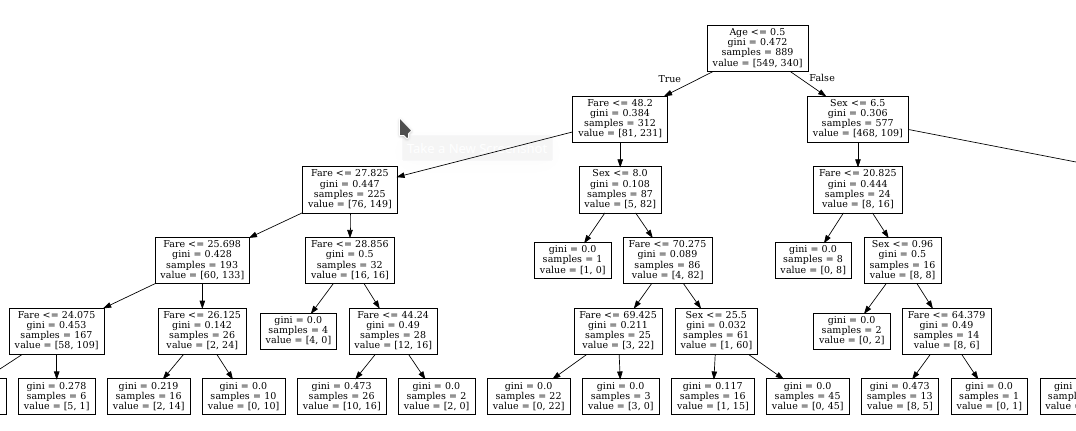